In [26]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [27]:
df = pd.read_csv('movieReplicationSet.csv')
df

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,3.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,0,0
1093,3.0,4.0,NaN,NaN,4.0,4.0,2.5,NaN,3.5,3.5,...,5.0,3.0,5.0,5.0,5.0,6.0,5.0,1.0,0,0
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,...,6.0,3.0,1.0,6.0,6.0,4.0,2.0,1.0,0,0
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,4.0,3.0,3.0,1.0,1.0,0,1


In [28]:
df.columns[474]

'Gender identity (1 = female; 2 = male; 3 = self-described)'

In [29]:
gender_col = df['Gender identity (1 = female; 2 = male; 3 = self-described)']

In [30]:
gender_col

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1092    1.0
1093    1.0
1094    1.0
1095    1.0
1096    1.0
Name: Gender identity (1 = female; 2 = male; 3 = self-described), Length: 1097, dtype: float64

In [31]:
gender_col.value_counts()

Gender identity (1 = female; 2 = male; 3 = self-described)
1.0    807
2.0    260
3.0      6
Name: count, dtype: int64

In [32]:
male = gender_col[gender_col == 2].index
female = gender_col[gender_col == 1].index

In [33]:
movie_male = df.iloc[male]
movie_male = movie_male['Shrek (2001)']
movie_male

9       4.0
13      3.0
15      3.5
17      NaN
19      2.0
       ... 
1082    4.0
1084    1.0
1088    2.5
1089    3.0
1090    3.0
Name: Shrek (2001), Length: 260, dtype: float64

In [34]:
movie_female = df.iloc[female]
movie_female = movie_female['Shrek (2001)']
movie_female

0       3.0
1       3.0
2       3.5
3       0.5
4       3.0
       ... 
1092    3.0
1093    4.0
1094    3.5
1095    2.5
1096    2.0
Name: Shrek (2001), Length: 807, dtype: float64

In [35]:
t_stat, p_value = ttest_ind(movie_male, movie_female, nan_policy='omit')
print(t_stat, p_value)

-1.1016699726285886 0.27087511813734194


In [40]:
t_stat, p_value = ttest_ind(movie_male, movie_female, nan_policy='omit', alternative='greater')
print(t_stat, p_value)

-1.1016699726285886 0.8645624409313291


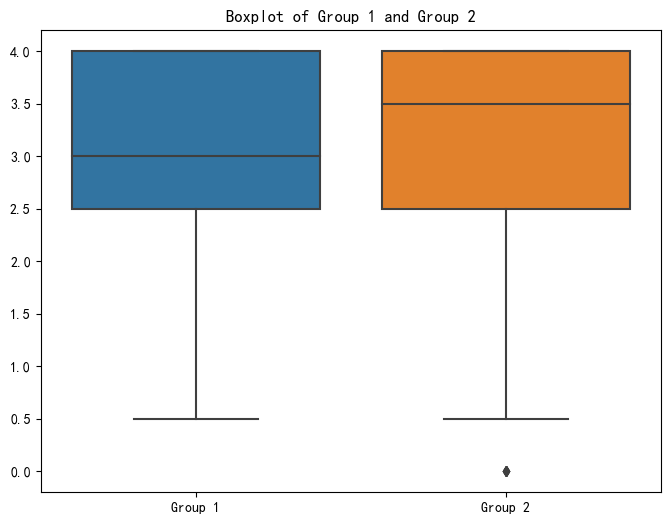

In [37]:
plt.figure(figsize=(8,6))
sns.boxplot(data=[movie_male, movie_female])
plt.xticks([0, 1], ['Group 1', 'Group 2'])
plt.title('Boxplot of Group 1 and Group 2')
plt.show()


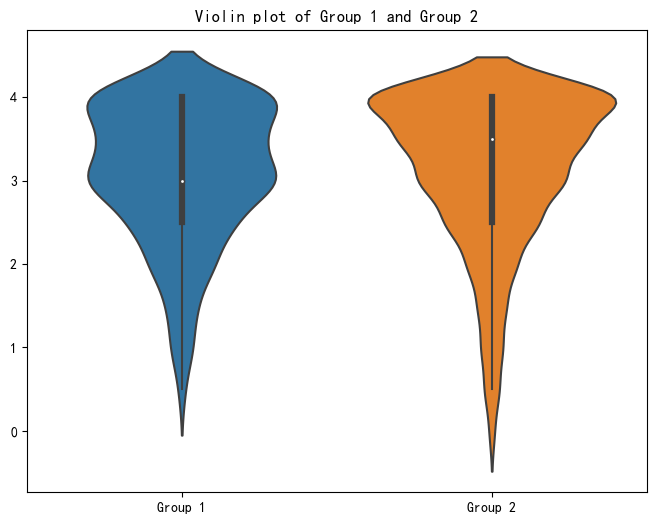

In [38]:
plt.figure(figsize=(8,6))
sns.violinplot(data=[movie_male, movie_female])
plt.xticks([0, 1], ['Group 1', 'Group 2'])
plt.title('Violin plot of Group 1 and Group 2')
plt.show()


In [49]:
np.var(movie_male)

0.6777603691396499

In [50]:
np.var(movie_female)

0.8207206244373235

In [52]:
import numpy as np
from scipy.stats import levene

# 生成两组模拟数据


# 执行 Levene's test
stat, p = levene(movie_male.dropna(), movie_female.dropna())

print(f"Levene's Test Statistic: {stat}")
print(f"P-Value: {p}")

if p < 0.005:
    print("Variances are significantly different")
else:
    print("Variances are not significantly different")


Levene's Test Statistic: 0.44722614898750407
P-Value: 0.503812335250825
Variances are not significantly different


In [54]:
np.mean(movie_male.dropna())

3.08298755186722

In [55]:
np.mean(movie_female.dropna())

3.155450874831763